In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from joblib import dump, load

In [61]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# Checking the correlation
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

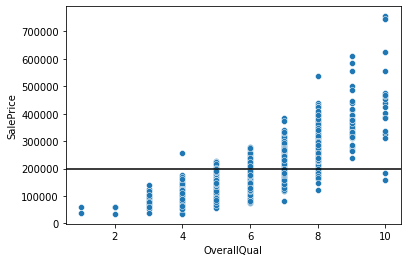

In [64]:
# Scatter Plot for SalePrice vs OverallQual
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')
plt.axhline(y=200000,color='k')

In [65]:
# Showing the rows of outliers for OverallQual
df[(df['OverallQual'] > 8) & (df['SalePrice'] < 200000)][['SalePrice', 'OverallQual']]

,SalePrice,OverallQual
523,184750,10
1298,160000,10


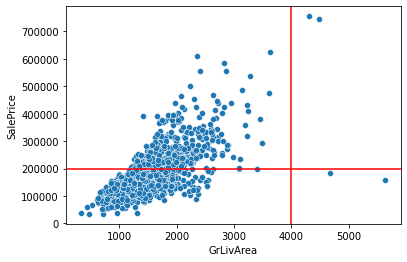

In [66]:
# Scatter Plot for SalePrice vs GrLivArea
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.axhline(y=200000,color='r')
plt.axvline(x=4000,color='r')

In [67]:
# Showing the rows of outliers for GrLivArea
df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)][['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [68]:
# Removing the outliers
index_drop=df[(df['GrLivArea']>4000) & (df['SalePrice']<200000)].index
df=df.drop(index_drop, axis=0)

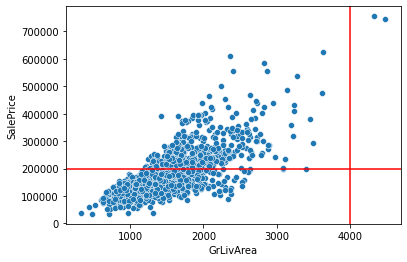

In [69]:
# Scatter Plot for checking the conditions of outliers
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

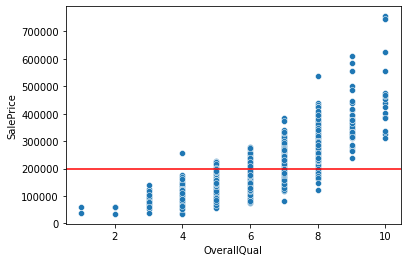

In [70]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.axhline(y=200000,c='r')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

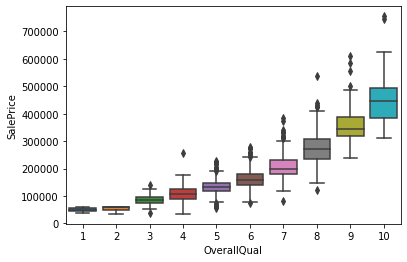

In [71]:
# Box Plot
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

In [72]:
# Checking the missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC         1452
MiscFeature    1404
Alley          1367
Fence          1177
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [73]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [74]:
df= df.dropna(axis=0, subset=['Electrical'])

In [75]:
# Droping missing data
df= df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [76]:
# Filling the missing data
Gar_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[Gar_cols] = df[Gar_cols].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

Bsmt_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'MasVnrType']
df[Bsmt_cols] = df[Bsmt_cols].fillna('None')

df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda col: col.fillna(col.mean()))

In [77]:
# Final checking of missing data
df.isnull().sum().sort_values(ascending=False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [78]:
# Converting string to values
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1457 non-null   object
 1   Street         1457 non-null   object
 2   LotShape       1457 non-null   object
 3   LandContour    1457 non-null   object
 4   Utilities      1457 non-null   object
 5   LotConfig      1457 non-null   object
 6   LandSlope      1457 non-null   object
 7   Neighborhood   1457 non-null   object
 8   Condition1     1457 non-null   object
 9   Condition2     1457 non-null   object
 10  BldgType       1457 non-null   object
 11  HouseStyle     1457 non-null   object
 12  RoofStyle      1457 non-null   object
 13  RoofMatl       1457 non-null   object
 14  Exterior1st    1457 non-null   object
 15  Exterior2nd    1457 non-null   object
 16  MasVnrType     1457 non-null   object
 17  ExterQual      1457 non-null   object
 18  ExterCond      1457 non-null

In [79]:
# One hot Encoding
df_obj= pd.get_dummies(df_obj, drop_first=True)
Final_df= pd.concat([df_num, df_obj], axis=1)
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 242 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(204)
memory usage: 734.2 KB


In [80]:
# Checking SalePrice Correlation
data_correlations = Final_df.corr(method = 'pearson')
data_correlations['SalePrice'].sort_values()

ExterQual_TA       -0.589947
KitchenQual_TA     -0.520124
BsmtQual_TA        -0.453018
GarageFinish_Unf   -0.411144
MasVnrType_None    -0.368013
                      ...   
GarageCars          0.641111
TotalBsmtSF         0.651553
GrLivArea           0.734962
OverallQual         0.795863
SalePrice           1.000000
Name: SalePrice, Length: 242, dtype: float64

In [81]:
# Using Linear Regression

X = Final_df.drop('SalePrice', axis = 1)
y = Final_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model= LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
MSE_LiReg= metrics.mean_squared_error(y_test, y_pred)
RMSE_LiReg=np.sqrt(MSE_LiReg)
print('RMSE_LiReg =', RMSE_LiReg )
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head()

RMSE_LiReg = 23863.352093807724


,Y_Test,Y_Pred
666,129000,168778.343383
104,169500,185229.584353
1108,181000,169170.762890
18,159000,150859.658956
1024,287000,293506.197950


In [82]:
# Using Ploynomial Regression

polynomial_converter = PolynomialFeatures(degree = 2 , include_bias = False)
polynomial_features = polynomial_converter.fit_transform(X)
polynomial_features.shape
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size = 0.3, random_state = 101  )
polymodel_norm = LinearRegression (normalize = True)
model_fitted_normalized = polymodel_norm.fit(X_train, y_train )
print(polymodel_norm.coef_.shape)

C:\Users\DR. KIMANI\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(29402,)


In [83]:
# Prediction

y_pred_norm = polymodel_norm.predict(X_test)
pd.DataFrame ( {'Y_pred': y_pred_norm, 'Y_test': y_test, 'Residual': y_test - y_pred_norm}).head()

,Y_pred,Y_test,Residual
666,220162.450134,129000,-91162.450134
104,188042.879091,169500,-18542.879091
1108,154148.718024,181000,26851.281976
18,158498.100719,159000,501.899281
1024,316159.225732,287000,-29159.225732


In [84]:
# Evaluating the Model

MAE = metrics.mean_absolute_error(y_pred_norm, y_test)
MSE = metrics.mean_squared_error(y_pred_norm, y_test)
RMSE = np.sqrt (MSE )
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,2.047713e+04
MSE,1.014056e+09
RMSE,3.184425e+04


In [85]:
# LassoCV

scaler = StandardScaler()
scaler.fit(X_train)
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, cv=5)
lasso_cv_model.fit(X_train_transform, y_train)
y_pred_lasso = lasso_cv_model.predict(X_test)
MAE_Lasso = metrics.mean_absolute_error (y_pred_lasso, y_test)
MSE_Lasso = metrics.mean_squared_error (y_pred_lasso, y_test)
RMSE_Lasso = np.sqrt(MSE_Lasso)
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

,Lasso Metrics
MAE,5.155048e+10
MSE,3.385050e+21
RMSE,5.818118e+10


In [86]:
# RidgeCV

ridgecvmodel = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridgecvmodel.fit(X_train_transform, y_train )
y_pred_ridgecv = ridgecvmodel.predict(X_test_transform)
MAE_ridge = metrics.mean_absolute_error(y_pred_ridgecv, y_test)
MSE_ridge = metrics.mean_squared_error(y_pred_ridgecv, y_test)
RMSE_ridge = np.sqrt(MSE_ridge)
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

,Ridge Metrics
MAE,1.955024e+04
MSE,9.525097e+08
RMSE,3.086276e+04


In [87]:
# Elastic Net

elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)
elastic_model.fit(X_train_transform, y_train)
y_pred_elastic=elastic_model.predict(X_test_transform)
MAE_Elastic = metrics.mean_absolute_error(y_pred_elastic, y_test)
MSE_Elastic = metrics.mean_squared_error(y_pred_elastic, y_test)
RMSE_Elastic = np.sqrt(MSE_Elastic)
pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'], columns=['Elastic Metrics'])

,Elastic Metrics
MAE,1.488890e+04
MSE,4.877591e+08
RMSE,2.208527e+04


In [88]:
pd.DataFrame({'RMSE Error for Regresssion Models':
                [RMSE_LiReg, RMSE, RMSE_ridge, RMSE_Lasso, RMSE_Elastic]},
              index=['Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic'])

,RMSE Error for Regresssion Models
Linear,2.386335e+04
Polynomial,3.184425e+04
Ridge,3.086276e+04
Lasso,5.818118e+10
Elastic,2.208527e+04
